# Ismail Olumegbon

# Home Work #4

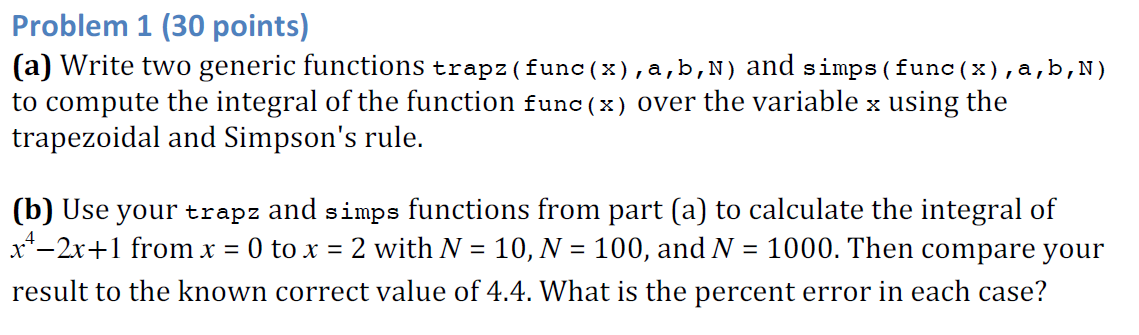

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# (a)

In [64]:
def func(x,c0,c1,c2,c3,c4):
    y=c4*x**4 + c3*x**3 + c2*x**2 + c1*x + c0
    return y

In [65]:
def trapz(f,a,b,N,*args):
    h=(b-a)/N
    x=np.arange(a,b+h,h)
    f=func(x,*args)
    w=np.ones_like(x)
    w[0]=w[-1]=0.5
    A=np.sum(h*w*f)
    pe = np.abs(A-4.4)*100/4.4
    return A, pe

In [66]:
def simpson(f,a,b,N,*args):
    if N%2 ==1:
        print('number of intervals N must be an even number... just using N+1')
        N=N+1

    h=(b-a)/N
    tau=np.arange(a,b+h,h)
    f=func(tau,*args)
    w=np.ones_like(tau)
    w[0]=w[-1]=1/3
    w[1:-1:2]=4/3
    w[2:-2:2]=2/3
    B=np.sum(h*w*f)
    pes = np.abs(A-4.4)*100/4.4
    return B, pes

# (b)

In [67]:
A1, pe1 = trapz(func,0,2,10,1,-2,0,0,1)
A2, pe2 = trapz(func,0,2,100,1,-2,0,0,1)
A3, pe3 = trapz(func,0,2,1000,1,-2,0,0,1)
print(f'The integral(Trapezoidal with N = 10) of the function is {round(A1,5)}, with a percentage error of {round(pe1,5)} % from the correct value')
print('')
print(f'The integral(Trapezoidal with N = 100) of the function is {round(A2,5)}, with a percentage error of {round(pe2,5)} % from the correct value')
print('')
print(f'The integral(Trapezoidal with N = 1000) of the function is {round(A3,5)}, with a percentage error of {round(pe3,5)} % from the correct value')

The integral(Trapezoidal with N = 10) of the function is 4.50656, with a percentage error of 2.42182 % from the correct value

The integral(Trapezoidal with N = 100) of the function is 4.40107, with a percentage error of 0.02424 % from the correct value

The integral(Trapezoidal with N = 1000) of the function is 4.40001, with a percentage error of 0.00024 % from the correct value


In [68]:
B1, pes1 = simpson(func,0,2,10,1,-2,0,0,1)
B2, pes2 = simpson(func,0,2,100,1,-2,0,0,1)
B3, pes3 = simpson(func,0,2,1000,1,-2,0,0,1)
print(f'The integral(Simpson with N = 10) of the function is {round(B1,5)}, with a percentage error of {round(pes1,5)} % from the correct value')
print('')
print(f'The integral(Simpson with N = 100) of the function is {round(B2,5)}, with a percentage error of {round(pes2,5)} % from the correct value')
print('')
print(f'The integral(Simpson with N = 1000) of the function is {round(B3,5)}, with a percentage error of {round(pes3,5)} % from the correct value')

The integral(Simpson with N = 10) of the function is 4.40043, with a percentage error of 0.00024 % from the correct value

The integral(Simpson with N = 100) of the function is 4.4, with a percentage error of 0.00024 % from the correct value

The integral(Simpson with N = 1000) of the function is 4.4, with a percentage error of 0.00024 % from the correct value


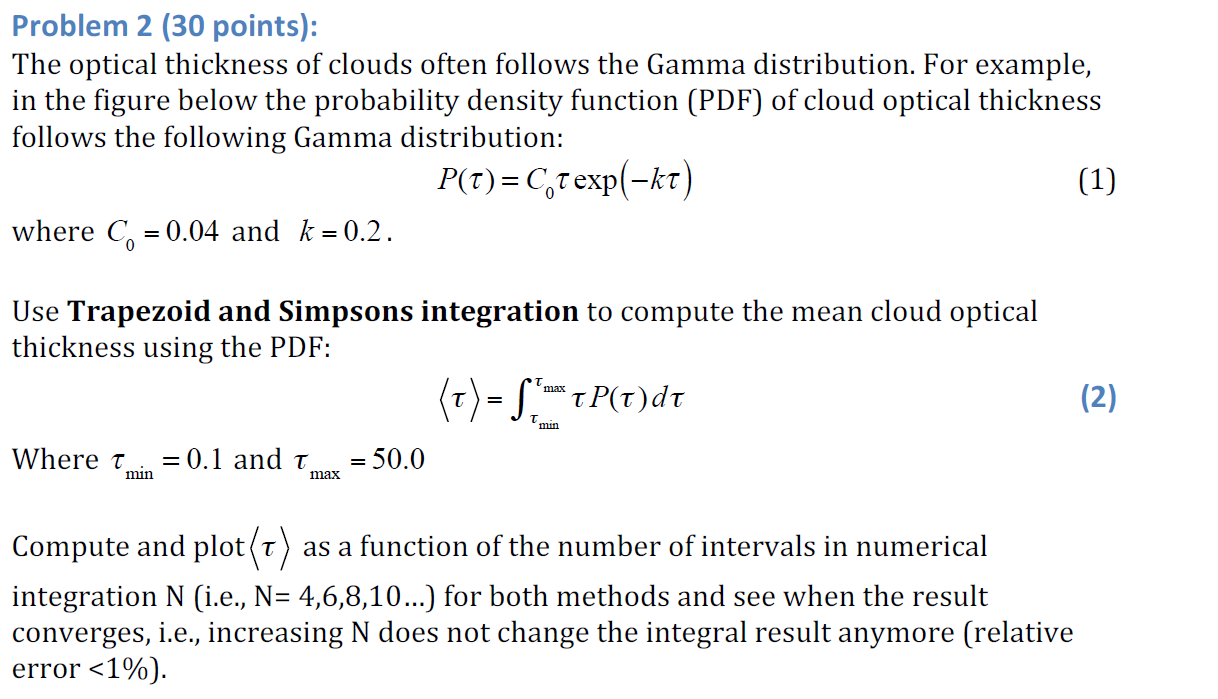

In [69]:
def opt_thickness(tau, k, co):
  COT = tau*(co*tau*np.exp(-k*tau))
  return COT

In [74]:
def trapz(f,a,b,N,*args):  
    h=(b-a)/N
    tau=np.arange(a,b+h,h)
    f=opt_thickness(tau,*args)
    w=np.ones_like(tau)
    w[0]=w[-1]=0.5
    A=np.sum(h*w*f)
    return A

In [73]:
def simpson(f,a,b,N,*args):
    if N%2 ==1:
        print('number of intervals N must be an even number... just using N+1')
        N=N+1

    h=(b-a)/N
    tau=np.arange(a,b+h,h)
    f=opt_thickness(tau,*args)
    w=np.ones_like(tau)
    w[0]=w[-1]=1/3
    w[1:-1:2]=4/3
    w[2:-2:2]=2/3
    B=np.sum(h*w*f)
    return B

In [90]:
Nrange = np.arange(4, 40, 2)
Cloud_thichness = [trapz(opt_thickness,0.1,50,i,0.2, 0.004) for i in Nrange]
Cloud_thichness2 = [simpson(opt_thickness,0.1,50,i,0.2, 0.004) for i in Nrange]

In [91]:
COD = np.array(Cloud_thichness)
COD2 = np.array(Cloud_thichness2)

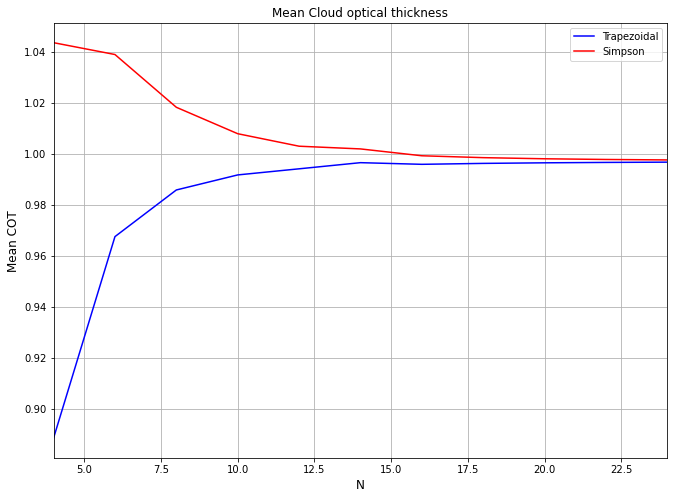

In [95]:
fig,ax = plt.subplots(figsize=(11,8))
ax.plot(Nrange, COD,'b-', label='Trapezoidal')
ax.plot(Nrange, COD2,'r-', label='Simpson')
ax.set_ylabel('Mean COT',fontsize='large')
ax.set_xlabel(r'N',fontsize='large')
ax.grid(True)
ax.set_title('Mean Cloud optical thickness',fontsize='large')
ax.set_xlim(4.0,24)
ax.legend()
plt.show()

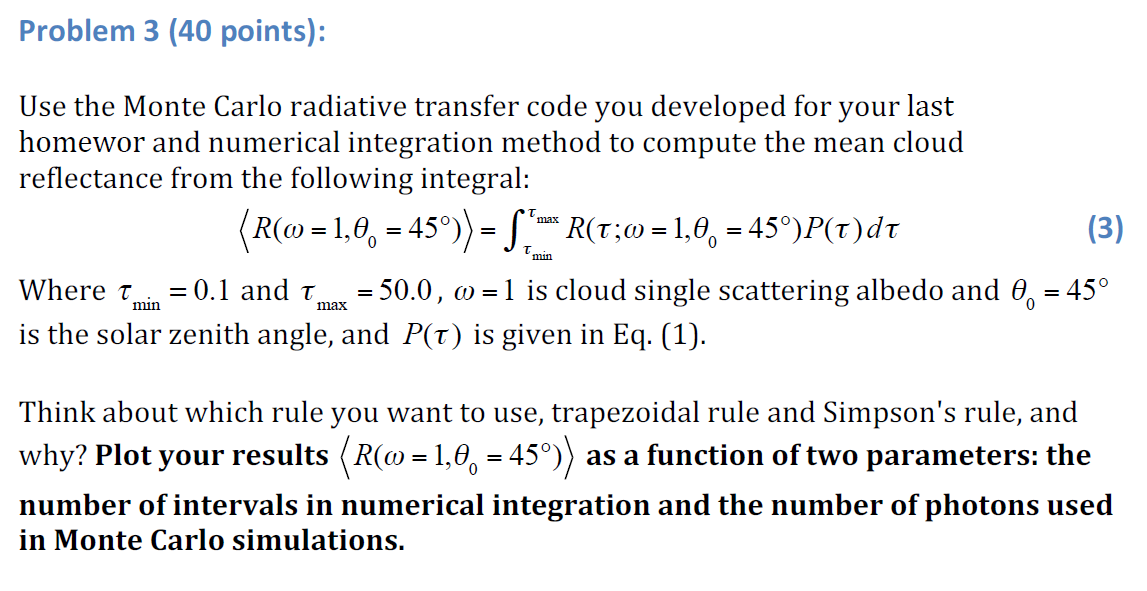

In [146]:
def Monte_Carlo_Simulation(tau, Nin, w, SZA):
    Nref=0
    Nabs=0
    Ntra=0
    Ntot=Nin
    for photon_count in range(1,Nin + 1):
        s=-np.log(1.-(np.random.random()))* np.cos(np.deg2rad(SZA))
        if (0 < s < tau).any():
        #if 0 < s and s < tau:
            pos = s
            while (0 < pos < tau).any():
            #while 0 < pos and pos < tau:
                if np.random.random() <= w:
                    u=2*(np.random.random())-1
                    theta = np.rad2deg(np.arccos(u))
                    s_new=-np.log(1.-(np.random.random()))
                    pos+= s_new * np.cos(np.deg2rad(theta))
                else:
                    Nabs+=1
                    break
            else:
                if pos<0:
                    Nref+=1
                elif (pos > tau).any() :
                    Ntra+=1
        elif s < 0:
            Nref+=1
        elif s>tau:
            Ntra+=1
    return Nref/Ntot

In [155]:
def mean_reflectance(tau, k, co, Nin):
    meanCR = Monte_Carlo_Simulation(tau, Nin, 1, 45)*(co*tau*np.exp(-k*tau))
    return meanCR

In [132]:
def simpson(f,a,b,N,*args):
    if N%2 ==1:
        print('number of intervals N must be an even number... just using N+1')
        N=N+1

    h=(b-a)/N
    tau=np.arange(a,b+h,h)
    f=mean_reflectance(tau,*args)
    w=np.ones_like(tau)
    w[0]=w[-1]=1/3
    w[1:-1:2]=4/3
    w[2:-2:2]=2/3
    B=np.sum(h*w*f)
    return B

In [158]:
a = 0.1
b = 50
k= 0.2
co = 0.004
SZA = 45
w = 1

Nrange = np.arange(4, 40, 2)
Cloud_reflectance1 = [simpson(mean_reflectance,a,b,i,0.2, 0.004, 100) for i in Nrange] # Nin = 100
Cloud_reflectance2 = [simpson(mean_reflectance,a,b,i,0.2, 0.004, 500) for i in Nrange] # Nin = 500
Cloud_reflectance3 = [simpson(mean_reflectance,a,b,i,0.2, 0.004, 1000) for i in Nrange] # Nin = 1000
Cloud_reflectance4 = [simpson(mean_reflectance,a,b,i,0.2, 0.004, 5000) for i in Nrange] # Nin = 50000
Cloud_reflectance5 = [simpson(mean_reflectance,a,b,i,0.2, 0.004, 10000) for i in Nrange] # Nin = 10000

In [159]:
R2 = np.array([Cloud_reflectance1, Cloud_reflectance2, Cloud_reflectance3, Cloud_reflectance4, Cloud_reflectance5])
R2.shape

(5, 18)

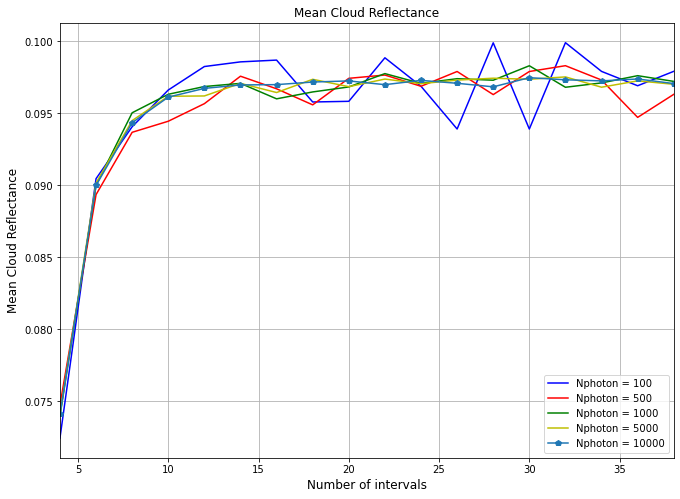

In [162]:
fig,ax = plt.subplots(figsize=(11,8))
ax.plot(Nrange,R2[0,:],'b-', label='Nphoton = 100')
ax.plot(Nrange,R2[1,:],'r-', label='Nphoton = 500')
ax.plot(Nrange,R2[2,:],'g-', label='Nphoton = 1000')
ax.plot(Nrange,R2[3,:],'y-', label= 'Nphoton = 5000')
ax.plot(Nrange,R2[4,:],'p-', label='Nphoton = 10000')
ax.set_ylabel('Mean Cloud Reflectance',fontsize='large')
ax.set_xlabel(r'Number of intervals',fontsize='large')
ax.grid(True)
ax.set_title('Mean Cloud Reflectance',fontsize='large')
ax.set_xlim(4.0,38)
ax.legend()
plt.show()

In [171]:
a = 0.1
b = 50
k= 0.2
co = 0.004
SZA = 45
w = 1

Nphoton_range = np.arange(500, 5000, 500)
Cloud_reflectance6 = [simpson(mean_reflectance,a,b,14,0.2, 0.004, j) for j in Nphoton_range] # Ninterval = 14
Cloud_reflectance7 = [simpson(mean_reflectance,a,b,20,0.2, 0.004, j) for j in Nphoton_range] # Ninterval = 20
Cloud_reflectance8 = [simpson(mean_reflectance,a,b,26,0.2, 0.004, j) for j in Nphoton_range] # Ninterval = 26
Cloud_reflectance9 = [simpson(mean_reflectance,a,b,32,0.2, 0.004, j) for j in Nphoton_range] # Ninterval = 32
Cloud_reflectance10 = [simpson(mean_reflectance,a,b,38,0.2, 0.004, j) for j in Nphoton_range] # Ninterval = 38

In [172]:
R3 = np.array([Cloud_reflectance6, Cloud_reflectance7, Cloud_reflectance8, Cloud_reflectance9, Cloud_reflectance10])
R3.shape

(5, 9)

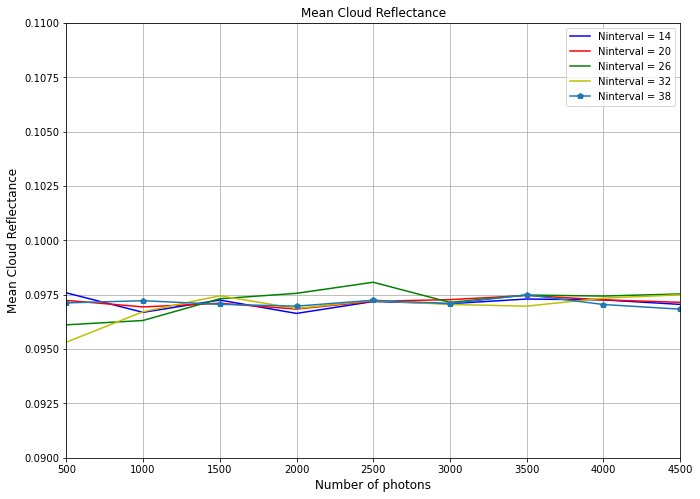

In [180]:
fig,ax = plt.subplots(figsize=(11,8))
ax.plot(Nphoton_range,R3[0,:],'b-', label='Ninterval = 14')
ax.plot(Nphoton_range,R3[1,:],'r-', label='Ninterval = 20')
ax.plot(Nphoton_range,R3[2,:],'g-', label='Ninterval = 26')
ax.plot(Nphoton_range,R3[3,:],'y-', label= 'Ninterval = 32')
ax.plot(Nphoton_range,R3[4,:],'p-', label='Ninterval = 38')
ax.set_ylabel('Mean Cloud Reflectance',fontsize='large')
ax.set_xlabel(r'Number of photons',fontsize='large')
ax.grid(True)
ax.set_title('Mean Cloud Reflectance',fontsize='large')
ax.set_xlim(500,4500)
ax.set_ylim(0.09,0.11)
ax.legend()
plt.show()